In [15]:
# pip install spotipy --upgrade
!pip install kagglehub

In [223]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="",
                                               client_secret="",
                                               redirect_uri="http://localhost:3000",
                                               scope=scope))

results = sp.current_user_saved_tracks()
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

0 ヨルシカ  –  アポリア
1 AKASAKI  –  Bunny Girl
2 EASHA  –  Far Away
3 Abhi The Nomad  –  Good Luck
4 Space Weather  –  West Coast Daze
5 jayo  –  worst case scenario
6 eamon mo  –  Your Games
7 Mik Ivy  –  Superman
8 Cowboy Malfoy  –  How I'd Kill
9 Cage The Elephant  –  Ain't No Rest for the Wicked
10 Foo Fighters  –  Everlong - Acoustic Version
11 Polyphia  –  ABC (feat. Sophia Black)
12 almost monday  –  cough drops
13 Two Door Cinema Club  –  What You Know
14 Her's  –  What Once Was
15 Her's  –  What Once Was
16 Laufey  –  From The Start
17 Aimee Carty  –  2 days into college
18 Lynyrd Skynyrd  –  Sweet Home Alabama
19 Wet Leg  –  Angelica


In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauthamvijayaraj/spotify-tracks-dataset-updated-every-week")

print("Path to dataset files:", path)

100%|██████████| 4.72M/4.72M [00:00<00:00, 14.3MB/s]


Extracting files...
Path to dataset files: C:\Users\Austin\.cache\kagglehub\datasets\gauthamvijayaraj\spotify-tracks-dataset-updated-every-week\versions\2


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [103]:
data = pd.read_csv('spotify_tracks.csv')
data.describe()

,year,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,62317.000000,62317.000000,62317.000000,62317.000000,6.231700e+04,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000
mean,2014.425935,15.358361,0.362292,0.596807,2.425270e+05,0.602496,0.146215,5.101658,0.194143,-65.103433,0.586052,0.087722,117.931247,3.857086,0.495226
std,9.645113,18.626908,0.314609,0.186209,1.129999e+05,0.246144,0.307804,3.553469,0.172030,2369.051478,0.493682,0.115150,28.509459,0.502660,0.264787
min,1971.000000,0.000000,-1.000000,-1.000000,5.000000e+03,-1.000000,-1.000000,-1.000000,-1.000000,-100000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2011.000000,0.000000,0.067100,0.497000,1.921600e+05,0.440000,0.000000,2.000000,0.093200,-10.727000,0.000000,0.036700,95.942000,4.000000,0.292000
50%,2017.000000,7.000000,0.286000,0.631000,2.362670e+05,0.639000,0.000025,5.000000,0.125000,-7.506000,1.000000,0.048900,117.991000,4.000000,0.507000
75%,2022.000000,26.000000,0.632000,0.730000,2.862400e+05,0.803000,0.015200,8.000000,0.243000,-5.456000,1.000000,0.089100,135.081000,4.000000,0.710000
max,2024.000000,93.000000,0.996000,0.986000,4.581483e+06,1.000000,0.999000,11.000000,0.998000,1.233000,1.000000,0.959000,239.970000,5.000000,0.995000


In [35]:
trimmed_columns=['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']
df = data[trimmed_columns]
df.describe()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000
mean,15.358361,0.362292,0.596807,0.602496,0.146215,5.101658,0.194143,-65.103433,0.586052,0.087722,117.931247,0.495226
std,18.626908,0.314609,0.186209,0.246144,0.307804,3.553469,0.172030,2369.051478,0.493682,0.115150,28.509459,0.264787
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-100000.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.067100,0.497000,0.440000,0.000000,2.000000,0.093200,-10.727000,0.000000,0.036700,95.942000,0.292000
50%,7.000000,0.286000,0.631000,0.639000,0.000025,5.000000,0.125000,-7.506000,1.000000,0.048900,117.991000,0.507000
75%,26.000000,0.632000,0.730000,0.803000,0.015200,8.000000,0.243000,-5.456000,1.000000,0.089100,135.081000,0.710000
max,93.000000,0.996000,0.986000,1.000000,0.999000,11.000000,0.998000,1.233000,1.000000,0.959000,239.970000,0.995000


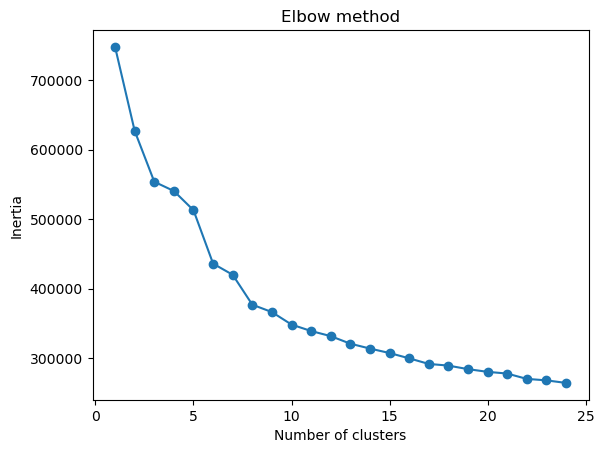

In [53]:
inertias = []

normalized_df=(df-df.mean())/df.std()

for i in range(1,25):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(normalized_df)
    inertias.append(kmeans.inertia_)

### Note: This isn't needed since we'll classify by 4 no matter what, still interesting.
plt.plot(range(1,25), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [69]:
normalized_df=(df-df.mean())/df.std()

kmeans = KMeans(n_clusters=4)
kmeans.fit(normalized_df)

df['labels'] = kmeans.labels_
df.describe()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,labels
count,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.00000
mean,15.358361,0.362292,0.596807,0.602496,0.146215,5.101658,0.194143,-65.103433,0.586052,0.087722,117.931247,0.495226,1.26378
std,18.626908,0.314609,0.186209,0.246144,0.307804,3.553469,0.172030,2369.051478,0.493682,0.115150,28.509459,0.264787,1.14437
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-100000.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.00000
25%,0.000000,0.067100,0.497000,0.440000,0.000000,2.000000,0.093200,-10.727000,0.000000,0.036700,95.942000,0.292000,0.00000
50%,7.000000,0.286000,0.631000,0.639000,0.000025,5.000000,0.125000,-7.506000,1.000000,0.048900,117.991000,0.507000,1.00000
75%,26.000000,0.632000,0.730000,0.803000,0.015200,8.000000,0.243000,-5.456000,1.000000,0.089100,135.081000,0.710000,2.00000
max,93.000000,0.996000,0.986000,1.000000,0.999000,11.000000,0.998000,1.233000,1.000000,0.959000,239.970000,0.995000,3.00000


In [83]:
df.groupby(['labels'])['popularity'].nlargest(5)

labels       
0       24629    49
        59984    47
        24915    46
        24841    45
        24916    45
1       24275    81
        24279    80
        24283    78
        21586    75
        23712    74
2       29190    37
        29371    36
        50080    33
        40564    32
        4818     31
3       49479    93
        26432    91
        26580    91
        54962    90
        23702    89
Name: popularity, dtype: int64

       acousticness  danceability        energy      liveness         tempo  \
count  62317.000000  62317.000000  62317.000000  62317.000000  62317.000000   
mean       0.362292      0.596807      0.602496      0.194143    117.931247   
std        0.314609      0.186209      0.246144      0.172030     28.509459   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        0.067100      0.497000      0.440000      0.093200     95.942000   
50%        0.286000      0.631000      0.639000      0.125000    117.991000   
75%        0.632000      0.730000      0.803000      0.243000    135.081000   
max        0.996000      0.986000      1.000000      0.998000    239.970000   

            valence  
count  62317.000000  
mean       0.495226  
std        0.264787  
min       -1.000000  
25%        0.292000  
50%        0.507000  
75%        0.710000  
max        0.995000  


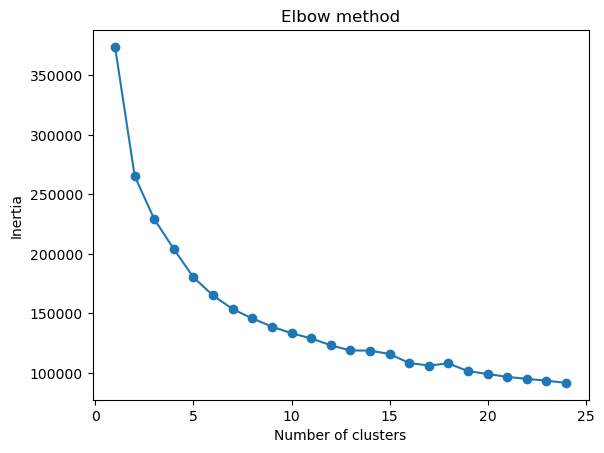

C:\Users\Austin\AppData\Local\Temp\ipykernel_1304\2656574021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'] = kmeans.labels_
C:\Users\Austin\AppData\Local\Temp\ipykernel_1304\2656574021.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity'] = data['popularity']
C:\Users\Austin\AppData\Local\Temp\ipykernel_1304\2656574021.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [111]:
trimmed_columns=['acousticness', 'danceability', 'energy', 'liveness', 'tempo', 'valence']
df = data[trimmed_columns]
print(df.describe())

inertias = []
normalized_df=(df-df.mean())/df.std()

for i in range(1,25):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(normalized_df)
    inertias.append(kmeans.inertia_)

### Note: This isn't needed since we'll classify by 4 no matter what, still interesting.
plt.plot(range(1,25), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

normalized_df=(df-df.mean())/df.std()
kmeans = KMeans(n_clusters=4)
kmeans.fit(normalized_df)

df['labels'] = kmeans.labels_
df['popularity'] = data['popularity']
df['track_id'] = data['track_id']

In [277]:
print(df.groupby(['labels'])['popularity'].nlargest(5))

idx = df.groupby(['labels'])['popularity'].transform(lambda x: x.nlargest(5)) == df['popularity']
group_tops = df[idx].sort_values('labels')

output = []
for i in range(0, len(group_tops)):
    group = group_tops.iloc[i]['labels']
    track = sp.track(group_tops.iloc[i]['track_id'])
    artist_names = ''
    for artist in track['artists']:
        artist_names = artist_names + artist['name'] + ', '
    artist_names = artist_names[:-2]
    
    output.append((group, track['name'], artist_names))

labels       
0       49479    93
        26432    91
        26580    91
        54962    90
        23702    89
1       22934    85
        26560    85
        7215     83
        35867    83
        24275    81
2       26433    87
        21327    86
        61460    86
        23703    85
        42667    85
3       24273    89
        24274    88
        21581    87
        21582    87
        38115    87
Name: popularity, dtype: int64


In [279]:
output

[(0, 'Big Dawgs', 'Hanumankind, Kalmi'),
 (0, 'Starboy', 'The Weeknd, Daft Punk'),
 (0, 'Anti-Hero', 'Taylor Swift'),
 (0, 'Blinding Lights', 'The Weeknd'),
 (0, 'Bye Bye Bye - From Deadpool and Wolverine Soundtrack', '*NSYNC'),
 (1,
  'Satranga (From "ANIMAL")',
  'Arijit Singh, Shreyas Puranik, Siddharth - Garima'),
 (1, 'Dream On', 'Aerosmith'),
 (1, 'I Was Never There', 'The Weeknd, Gesaffelstein'),
 (1, 'exile (feat. Bon Iver)', 'Taylor Swift, Bon Iver'),
 (1, 'Skyfall', 'Adele'),
 (2, 'Karma', 'Taylor Swift'),
 (2, 'Save Your Tears', 'The Weeknd'),
 (2, 'Ghost', 'Justin Bieber'),
 (2, 'Love The Way You Lie', 'Eminem, Rihanna'),
 (2, 'Soltera', 'Shakira'),
 (3, 'cardigan', 'Taylor Swift'),
 (3, 'Shape of You', 'Ed Sheeran'),
 (3, 'Perfect', 'Ed Sheeran'),
 (3, 'When I Was Your Man', 'Bruno Mars'),
 (3, 'august', 'Taylor Swift')]

In [377]:
import numpy as np

centroids = kmeans.cluster_centers_

# 2. For each cluster, find the point closest to the centroid
most_central_points = []

for cluster_idx in range(kmeans.n_clusters):
    cluster_points = normalized_df[kmeans.labels_ == cluster_idx]  # Points belonging to the cluster
    centroid = centroids[cluster_idx]
    
    # Compute distances from points in the cluster to the centroid
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    
    # Find the index of the point closest to the centroid
    closest_point_idx = np.argmin(distances)
    most_central_points.append(cluster_points.iloc[closest_point_idx].name)

# Search for track names.
output = []
for i in range(0, len(most_central_points)):
    idx = most_central_points[i]
    group = df.loc[idx]['labels']
    track = sp.track(df.loc[idx]['track_id'])
    artist_names = ''
    for artist in track['artists']:
        artist_names = artist_names + artist['name'] + ', '
    artist_names = artist_names[:-2]
    
    output.append((group, track['name'], artist_names))
output

[(0, 'Not Alone', 'Linkin Park'),
 (1, 'Under the Stars - From "The Lion King"/Score', 'Hans Zimmer, Lebo M.'),
 (2, 'BLUE - BIGBANG SPECIAL EVENT @ KYOCERA DOME OSAKA', 'BIGBANG'),
 (3, 'Shani Peedahaar Stotram', 'Vijayaa Shanker, Vijay Prakash, Vivekjyoti')]